<a href="https://www.datamics.com/courses/online-courses/">![title](bg_datamics_top.png)</a>

<center><em>© Datamics</em></center><br><center><em>Besuche uns für mehr Informationen auf <a href='https://www.datamics.com/courses/online-courses/'>www.datamics.com</a></em>
# Titanic Projekt - Lösung

Wilkommen zum Titanic Projekt. Wir werden Daten von [Kaggle](Titanic Projekt - Lösungen) analysieren. Du findest sie als "`titanic.csv` Datei im selben Verzeichnis wie dieses Notebook. 

Wir werden

# noch ausformulieren

Legen wir gleich los!

**Importiere Pandas. Und zusätzlich aus Pandas speziell "Series" und "DataFrame".**

In [1]:
import pandas as pd
from pandas import Series, DataFrame

**Lade die `titanic.csv` mit `read_csv` in einen DataFrame namens "titanic_df".**

In [2]:
titanic_df = pd.read_csv("titanic.csv")

**Schaue dir den `head` des DataFrame an.**

In [3]:
titanic_df.head()

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S

**Verwende `info()` auf den DataFrame.**

In [4]:
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


**Verwende `describe()` auf den DataFrame.**

In [5]:
titanic_df.describe()

PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  714.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.699118    0.523008   
std     257.353842    0.486592    0.836071   14.526497    1.102743   
min       1.000000    0.000000    1.000000    0.420000    0.000000   
25%     223.500000    0.000000    2.000000   20.125000    0.000000   
50%     446.000000    0.000000    3.000000   28.000000    0.000000   
75%     668.500000    1.000000    3.000000   38.000000    1.000000   
max     891.000000    1.000000    3.000000   80.000000    8.000000   

            Parch        Fare  
count  891.000000  891.000000  
mean     0.381594   32.204208  
std      0.806057   49.693429  
min      0.000000    0.000000  
25%      0.000000    7.910400  
50%      0.000000   14.454200  
75%      0.000000   31.000000  
max      6.000000  512.329200

Alle guten Analyse Prohekte beginnen mit einer Fragestellung. Jetzt wo wir wissen, wie unser DataFrame strukturell aussieht, können wir uns einige solcher Fragen überlegen. Was ist es, das wir erfahren möchten? Hier ist eine Liste an Fragen, die wir versuchen werden zu beantworten. Dazu nutzen wir natürlich unsere neu gelernten Analyse Fähigkeiten!

Einige grundlegende Fragen:

1. Wer waren die Passagiere auf der Titanic (Alter, Geschlecht, Klasse, etc.)?
2. Auf welchem Deck befanden sie sich und wie hängt das mit ihrere Klasse zusammen?
3. Woher kamen die Passagiere?
4. Wer war alleine an Board und wer mit seiner Familie?

Dann können wir noch versuchen herauszufinden, welche Faktoren beim Überleben geholfen haben:

5. Welche Faktoren halfen Passagieren dabei zu überleben?

Also beginnen wir mit unserer ersten Frage: Wer waren die Passagiere auf der Titanic?

**Importiere numpy, matplotlib, seaborn und setzte matplotlib inline.**

In [6]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

**Nutze Seaborn, um das Geschlecht (en. Sex) in einem countplot darzustellen.**

In [ ]:
# Dein Code hier

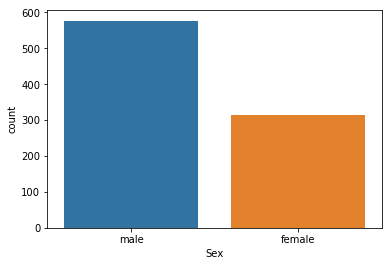

In [8]:
sns.countplot('Sex',data=titanic_df)

**Untersuche jetzt die Klassen (Spalte: Pclass) und trenne dabei nach Geschlecht (en. Sex).**

In [ ]:
# Dein Code hier

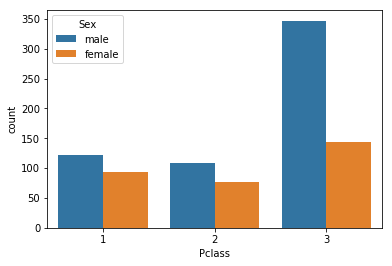

In [9]:
sns.countplot('Pclass',data=titanic_df,hue='Sex')

Wow, da sind deutlich mehr Männder als Frauen in der 3. Klasse. Eine interessante Erkenntnis. Nichtsdestotrotz könnte es nützlich sein darüberhinaus auch Kinder von Männern und Frauen zu Unterscheiden.

Wie können wir dafür vorgehen? Wir können jeden unter 16 Jahren als "child" (dt. Kind) einteilen. 

**Erstelle eine Funktion die folgendes tut: 1. Lese einen Passagier ein. 2. Rufe sein Alter und Geschlecht ab. 3. Wenn das Alter niedriger als 16 ist dann gebe "child" (dt. Kind) zurück. 4. Ansonsten gebe das Geschlecht (Spalte: sex) zurück.**

*Hinweis: Diese Funktion soll anschließend mit `apply()` angewendet werden.*

In [10]:
def male_female_child(passenger):
    age, sex = passenger
    if age < 16:
        return "child"
    else:
        return sex

**Wende deine Funktion von ebene mit `apply` an, um eine neue Spalte namens "person" zum DataFrame hinzuzufügen.**

In [11]:
titanic_df['person'] = titanic_df[['Age','Sex']].apply(male_female_child,axis=1)

**Überprüfe deinen letzten Arbeitsschnitt mit `head()` für die ersten 10 Einträge.**

In [13]:
titanic_df.head(10)

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   
5            6         0       3   
6            7         0       1   
7            8         0       3   
8            9         1       3   
9           10         1       2   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   
5                                   Moran, Mr. James    male   NaN      0   
6                            McCarthy, Mr. Timothy J    male  54.0      0   
7                     Palsson, Master. Gosta Leonard    male   2.0      3   
8  Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)  female  27.0      0   
9                Nasser, Mrs. Nicholas (Adele Achem)  female  14.0      1   

   Parch            Ticket     Fare Cabin Embarked  person  
0      0         A/5 21171   7.2500   NaN        S    male  
1      0          PC 17599  71.2833   C85        C  female  
2      0  STON/O2. 3101282   7.9250   NaN        S  female  
3      0            113803  53.1000  C123        S  female  
4      0            373450   8.0500   NaN        S    male  
5      0            330877   8.4583   NaN        Q    male  
6      0             17463  51.8625   E46        S    male  
7      1            349909  21.0750   NaN        S   child  
8      2            347742  11.1333   NaN        S  female  
9      0            237736  30.0708   NaN        C   child

Großartig! Jetzt haben wir die Passagiere in Frauen, Männer und Kinder unterteilt. Das könnte später wichtig sein, wenn wir uns der "Kinder und Frauen zuerst!" Regelung widmen.

**Erstelle erneut ein countplot für die Klassen und trenne nach "person".**

In [ ]:
# Dein Code hier

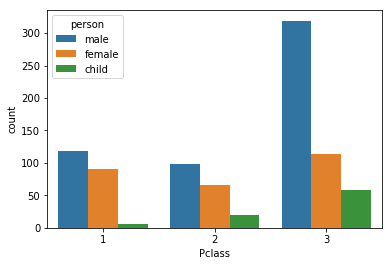

In [14]:
sns.countplot('Pclass',data=titanic_df,hue='person')

Interessant. Es gab einige Kinder in der 3. Klasse, dafür kaum Kinder in der 1. Klasse. Als nächstes könnten wir uns die Altersverteilung der Passagiere anschauen, um ein besseres Verständnis für sie zu erhalten.

**Erstelle mit Pandas ein Histogram für Age (dt. Alter) und verwende 70 bins.**

In [ ]:
# Dein Code hier

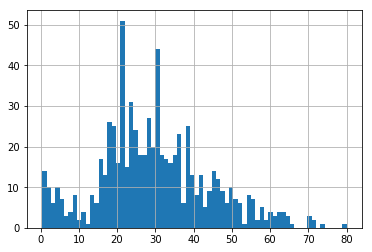

In [15]:
titanic_df['Age'].hist(bins=70)

**Schaue dir nun noch an, wie viele "male", "female" und "child" Werte wir in der person Spalte haben.**

In [16]:
titanic_df['person'].value_counts()

male      537
female    271
child      83
Name: person, dtype: int64

Eine weitere Möglichkeit die Daten zu visualisieren ist es mehrere Plots in einem FacetGrid unterzubringen.

**Baue die zu sehende Visualisierung nach. Verwende gerne die Tipps dazu:**

1. Die Quelle ist titanic_df
2. Wir trennen nach der Spalte "Sex"
3. Die Aspect Ration ist benutzerdefiniert (`aspect`)
4. Wir haben die x-Achse auf das Alter des ältesten Passagiers limitiert
5. Die Legende wird angezeigt

In [ ]:
# Dein Code hier

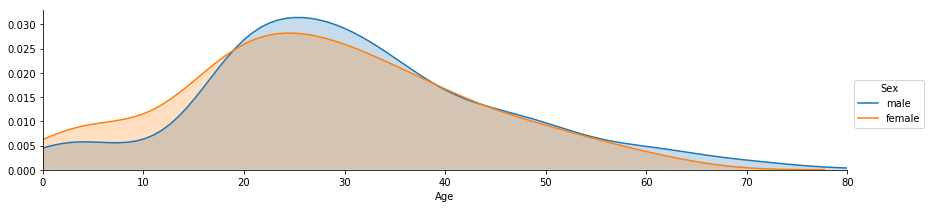

In [18]:
fig = sns.FacetGrid(titanic_df, hue="Sex",aspect=4)
fig.map(sns.kdeplot,'Age',shade= True)
oldest = titanic_df['Age'].max()
fig.set(xlim=(0,oldest))
fig.add_legend()

**Mache jetzt das gleiche für die "person" Spalte.**

In [ ]:
# Dein Code hier

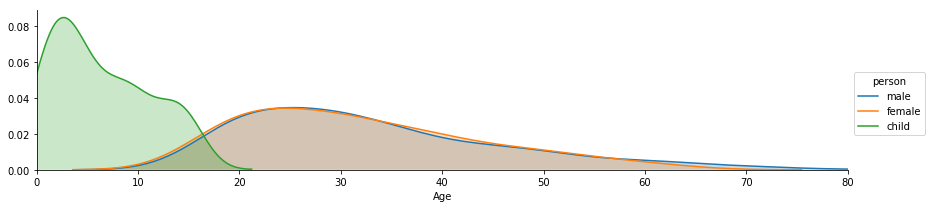

In [19]:
fig = sns.FacetGrid(titanic_df, hue="person",aspect=4)
fig.map(sns.kdeplot,'Age',shade= True)
oldest = titanic_df['Age'].max()
fig.set(xlim=(0,oldest))
fig.add_legend()

**Mache jetzt das gleiche für die "Pclass" Spalte.**

In [20]:
# Dein Code hier

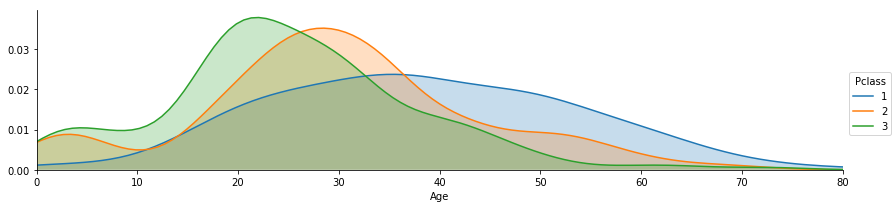

In [21]:
fig = sns.FacetGrid(titanic_df, hue="Pclass",aspect=4)
fig.map(sns.kdeplot,'Age',shade= True)
oldest = titanic_df['Age'].max()
fig.set(xlim=(0,oldest))
fig.add_legend()

Wir haben jetzt ein gutes Verständnis dafür erhalten, wer die Passagiere waren. Machen wir mit der 2. Frage weiter: Auf welchem Deck waren die Passagiere und wie hängt das mit ihrere Klasse zusammen?

**Schaue dir erneut den `head()` des DataFrames an.**

In [22]:
titanic_df.head()

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  person  
0      0         A/5 21171   7.2500   NaN        S    male  
1      0          PC 17599  71.2833   C85        C  female  
2      0  STON/O2. 3101282   7.9250   NaN        S  female  
3      0            113803  53.1000  C123        S  female  
4      0            373450   8.0500   NaN        S    male

Wir sehen hier, dass die Spalte "Cabin" (dt. Kabine) die Information über das Deck enthält. Allerdings liegen auch viele NaN Werte vor. Wir sollten sie loswerden.

**Erstelle ein neues Objekt "deck", dass die Cabin-Werte des DataFrames ausschließlich der NaN Werte enthält.**

In [23]:
deck = titanic_df['Cabin'].dropna()

**Kurzer Einblick in die ersten Zeilen des neuen Objekts.**

In [24]:
deck.head()

1      C85
3     C123
6      E46
10      G6
11    C103
Name: Cabin, dtype: object

Wir sehen hier, dass wir für das Deck (A, B, C, usw.) nur den ersten Buchstaben der Kabine brauchen. 

**Erstelle eine leere Liste "levels".**

In [25]:
levels = []

**Erstelle eine for-Schleife, die unserer Liste die Decks hinzufügt. Grundlage bildet die Kabine. Sortiere anschliesend deine Liste.**

In [32]:
for level in deck:
    levels.append(level[0])
    
levels.sort()

**Erstelle aus unserer Liste einen DataFrame "cabin_df". Bennen außerdem die Spalte in "Cabin" um.**

In [33]:
cabin_df = DataFrame(levels)
cabin_df.columns = ['Cabin']

**Nutze Seaborn, um ein countplot für die Passagiere pro Klasse zu erzeugen.**

In [34]:
# Dein Code hier

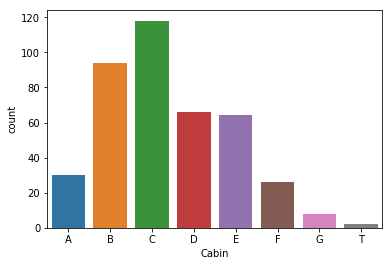

In [35]:
sns.countplot('Cabin',data=cabin_df)

Komischerweise haben wir eine "T" Kabine, die aus der Reihe fällt.

**Lösche diesen Werte aus dem DataFrame und erzeuge das Countplot erneut.**

In [ ]:
# Dein Code hier

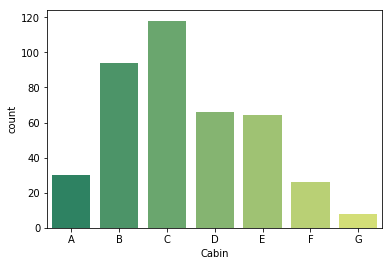

In [36]:
cabin_df = cabin_df[cabin_df.Cabin != 'T']
sns.countplot('Cabin',data=cabin_df,palette='summer')

*Hinweis: Im letzten Plot habe die Palette "Summer" genutzt. Du kannst nuten, was du möchtest oder beim Standard bleiben.**

Link zu allen Paletten: [http://matplotlib.org/users/colormaps.html](http://matplotlib.org/users/colormaps.html).

Jetzt wo wir die Verteilung über die Decks kennen kommen wir schon zu Frage 3: Woher kommen die Passagiere?

**Erneut: Schaue dir zuerst den Head des DataFrames an.**

In [37]:
titanic_df.head()

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  person  
0      0         A/5 21171   7.2500   NaN        S    male  
1      0          PC 17599  71.2833   C85        C  female  
2      0  STON/O2. 3101282   7.9250   NaN        S  female  
3      0            113803  53.1000  C123        S  female  
4      0            373450   8.0500   NaN        S    male

Die "Embarked" Spalte (dt. eingeschifft) enthält die Buchstaben C, Q und S. Diese stehen für Cherbourg, Queenstown und Southhampton.

**Erstelle ein countplot für Embarked und trenne zusätzlich nach der Klasse.**

In [ ]:
# Dein Code hier

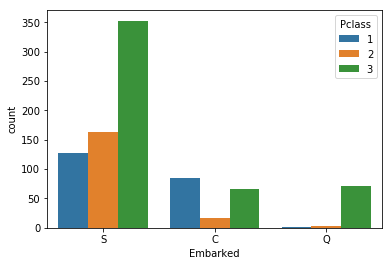

In [39]:
sns.countplot('Embarked',data=titanic_df,hue='Pclass')

Wir können hier sehen, dass fast alle Passagiere aus Queenstown der 3. Klasse zugestiegen sind. Interessant könnte sein sich die wirtschaftlichen Bedingungen der Städte zur damiligen Zeit anzuschauen.

Doch fahren wir nun mit unserer 4. Frage fort: Wer war alleine und wer mit seine Familie unterwegs?

**Füge eine neue Spalte "Alone" (dt. allein) hinzu. Sie soll als Inhalt die Summe der Spalten "Parch" und "SibSp" haben. Zeige diese anschließend an.**

*Hinweis: So berechnen wir die Anzahl an Eltern/Kindern und Geschwistern, die auch an Bord waren.**

In [40]:
titanic_df['Alone'] =  titanic_df.Parch + titanic_df.SibSp
titanic_df['Alone']

0       1
1       1
2       0
3       1
4       0
5       0
6       0
7       4
8       2
9       1
10      2
11      0
12      0
13      6
14      0
15      0
16      5
17      0
18      1
19      0
20      0
21      0
22      0
23      0
24      4
25      6
26      0
27      5
28      0
29      0
       ..
861     1
862     0
863    10
864     0
865     0
866     1
867     0
868     0
869     2
870     0
871     2
872     0
873     0
874     1
875     0
876     0
877     0
878     0
879     1
880     1
881     0
882     0
883     0
884     0
885     5
886     0
887     0
888     3
889     0
890     0
Name: Alone, Length: 891, dtype: int64

Wir wissen jetzt, dass immer wenn die Alone Spalte etwas anders als 0 ist, jemand nicht alleine gereist ist. Wir können die Spalte jetzt weiter bearbeiten.

**Überschreibe die Alone Spalte wie folgt: Wenn der Wert 0 ist, dann füge "Alone" (dt. allein) ein. Wenn der Wert größer als 0 ist, dann füge "With Family" (dt. mit Familie) ein.**

*Hinweis: Manchmal taucht dabei ein Error auf, den wir ignorieren können.*

In [41]:
titanic_df['Alone'].loc[titanic_df['Alone'] >0] = 'With Family'
titanic_df['Alone'].loc[titanic_df['Alone'] == 0] = 'Alone'

/Users/davidmika/anaconda3/lib/python3.5/site-packages/pandas/core/indexing.py:194: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


**Schaue dir das Ergebnis deiner Arbeit mit `head()` an.**

In [42]:
titanic_df.head()

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  person        Alone  
0      0         A/5 21171   7.2500   NaN        S    male  With Family  
1      0          PC 17599  71.2833   C85        C  female  With Family  
2      0  STON/O2. 3101282   7.9250   NaN        S  female        Alone  
3      0            113803  53.1000  C123        S  female  With Family  
4      0            373450   8.0500   NaN        S    male        Alone

**Erzeuge mit Seaborn eine einfache Visualisierung, die die alleinreisend mit den anderne vergleicht.**

In [ ]:
# Dein Code hier

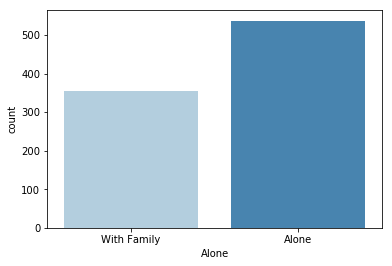

In [43]:
sns.countplot('Alone',data=titanic_df,palette='Blues')

Wir kennen unsere Daten jetzt schon ganz gut. Wir haben die Passagiere ziemlich umfassend kennengelernt und ein Gefühl dafür entwickelt, wer auf der Titanic gereist ist.

Beschäftigen wir uns nun mit der etwas komplexeren und offenen Frage danach, welche Faktoren beim Überleben eine Rolle gespielt haben.

Zum leichteren Verständnis wollen wir die Spalte "Survived" (dt. überlebt) mit der `map` Funktion etwas umwandeln.

**Ersteze die 0 mit "no" (dt. nein) und die 1 mit "yes" (dt. ja).**

In [44]:
titanic_df["Survivor"] = titanic_df.Survived.map({0: "no", 1: "yes"})

**Schaue dir nun die Verteilung zwischen Überlebenden und Nicht-Überlebenden mit Seaborn an.**

In [ ]:
# Dein Code hier

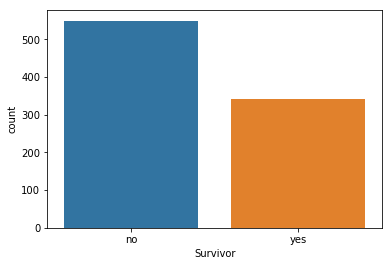

In [45]:
sns.countplot('Survivor',data=titanic_df)

Es sind also einige mehr Menschen gestorben, als überlebt haben. Lass uns untersuchen, ob die Klasse eine Rolle beim Überleben gespielt haben könnte. Wenn wir an den Film "Titanic" denken, hat er genau diesen Faktor sehr betont.

**Erstelle ein `factorplot`, das "Survived" und "Pclass" gegenüberstellt.**

In [ ]:
# Dein Code hier

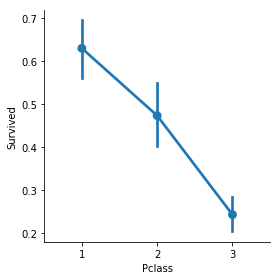

In [46]:
sns.factorplot('Pclass','Survived',data=titanic_df)

Sieht aus, als ob die Überlebensrate für die 3. Klasse sehr viel niedriger ist. Das könnte aber auch damit zusammenhängen, dass es viel mehr Männer in der 3. Klasse gab. Erinnert euch an die "Kinder und Frauen zuerst!"-Politik.

**Erstelle das Factorplot erneut, trenne diesesmal aber nach "person".**

In [ ]:
# Dein Code hier

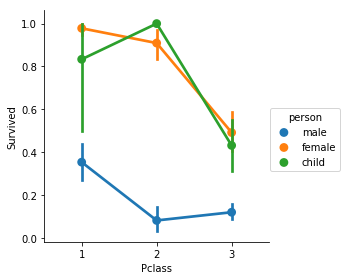

In [47]:
sns.factorplot('Pclass','Survived',hue='person',data=titanic_df)

Wir sehen hier, dass sowohl ein Mann zu sein, als auch in der 3. Klasse zu sein beides nicht begünstigend fürs Überleben war. Und auch unabhängig von der Klasse wurden die Überlebenschancen für Männer ziemlich stark reduziert.

Welche Rolle spielte das Alter? Hatte jünger oder älter zu sein einen Effekt?

**Erstelle ein `lmplot`, um den Zusammenhang zwischen Alter und Überleben zu überprüfen.**

In [ ]:
# Dein Code hier

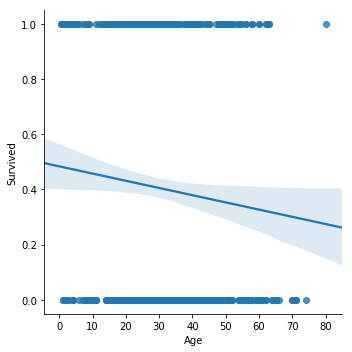

In [48]:
sns.lmplot('Age','Survived',data=titanic_df)

Sieht nach einem Trend aus: Je älter die Passagiere waren, desto unwahrscheinlicher ihr Überleben. Schauen wir uns erneut an, ob das für alle Klasse gleich ist.

**Erstelle das Lmplot erneut, trenne diesesmal aber nach "Pclass".**

In [ ]:
# Dein Code

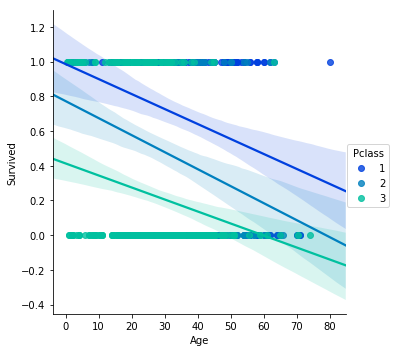

In [49]:
sns.lmplot('Age','Survived',hue='Pclass',data=titanic_df,palette='winter')

Wir können das `x_bins` Argument nutzen, um diese Darstellung etwas aufzuräumen. Dazu geben wir dir zunächst die Generationen:

In [50]:
generations=[10,20,40,60,80]

**Erstelle das Lmplot erneut für Age und Survieved. Dabei trennen wir außerdem nach Klasse. Binde außerdem die "generations" per `x_bins` ein.**

In [ ]:
# Dein Code hier

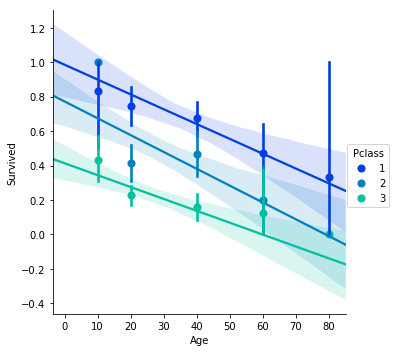

In [51]:
sns.lmplot('Age','Survived',hue='Pclass',data=titanic_df,palette='winter',x_bins=generations)

Interessante Erkenntnis für die älteren Passagiere der 1. Klasse. Was sehen wir, wenn wir Geschlecht und Alter mit dem Überleben übeprüfen?

**Erstelle das Lmplot erneut, trenne aber diesesmal nach Geschlecht (Spalte: Sex).**

In [ ]:
# Dein Code hier

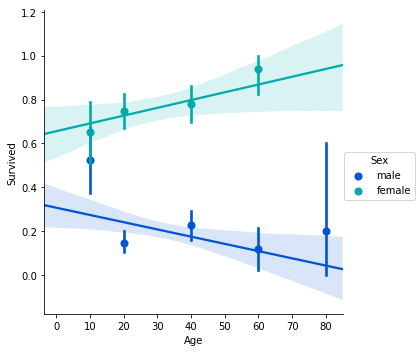

In [52]:
sns.lmplot('Age','Survived',hue='Sex',data=titanic_df,palette='winter',x_bins=generations)

Großartig! Wir konnten sehr viel über die Titanic, ihre Passagiere und deren Überleben herausfinden!

Falls du das möchtest kannst du gerne nioch weitere Faktoren untersuchen. Z.b den Zusammenhang zwischen dem Deck und dem Überleben. Alles weitere ist vollkommen freiwillig und optional.

# Gut gemacht!